#  Customer Segmentation with K-Means

## Table of Contents
1. [Project Overview](#-project-overview)  
2. [Data Exploration](#-data-exploration)  
   - Dataset Cleaning  
   - Scatterplot: Annual Income vs Spending Score by Gender  
3. [Data Preparation](#-data-preparation)  
   - Dropping Unnecessary Columns  
   - Renaming Features  
   - Scaling Data  
4. [Clustering](#-clustering)  
   - Elbow Method for Optimal Clusters  
   - Applying K-Means  
5. [Results & Visualization](#-results--visualization)  
   - Customer Segments Visualization  
   - Segment Characteristics  
6. [Conclusion & Recommendations](#-conclusion--recommendations)  
   - Key Insights  
   - Business Recommendations  


## Project Overview

The objective of this project is to group customers into meaningful segments based on Annual Income and Spending Score using the K-Means clustering algorithm.

Customer segmentation is essential for businesses as it helps:


* Identify customer groups with similar behaviors.
* Develop targeted marketing strategies.
* Improve customer satisfaction and loyalty.
* Optimize resource allocation by focusing on high-value segments.


## Import librairies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Load & Explore the Data

In [19]:
mail_customer_segmentation = pd.read_csv('/kaggle/input/mail-customer-segmentation/newfinal_data.csv')
mail_customer_segmentation.columns

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Age', 'Annual.Income..k..',
       'Spending.Score..1.100.', 'segments'],
      dtype='object')

## Data Exploration and preparation

We begin by inspecting and cleaning the dataset:

* Dropping irrelevant or duplicate columns.
* Checking for missing values.
* Exploring patterns in spending behavior.

In [20]:
# Drop unnecessary columns
df = mail_customer_segmentation.drop(columns=['Unnamed: 0', 'CustomerID', 'segments'])

# Rename columns for easier handling
df.rename(columns={
    'Annual.Income..k..': 'AnnualIncome',
    'Spending.Score..1.100.': 'SpendingScore'
}, inplace=True)

# Check for missing values
print(df.isnull().sum())

# Keep only numerical features for clustering
X = df[['AnnualIncome', 'SpendingScore']]


Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64


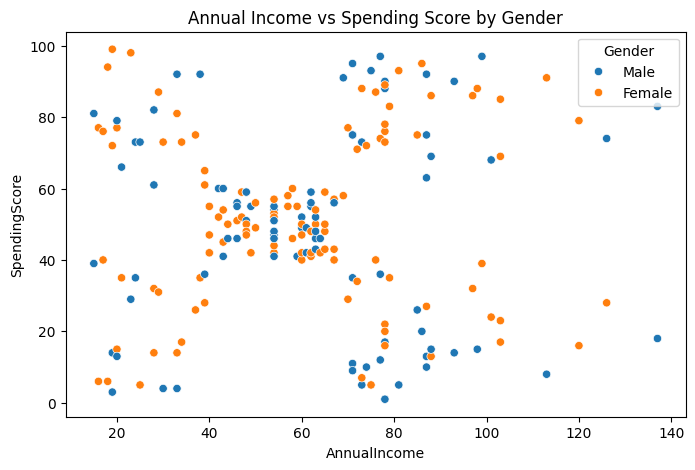

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Gender')
plt.title('Annual Income vs Spending Score by Gender')
plt.show()

To ensure accurate clustering, preprocessing involves removing irrelevant columns like IDs, renaming features for clarity, and scaling the data.
This guarantees that income and spending score have equal influence on the clustering process.

## Clustering

Let's explains the clustering process:

* Elbow Method: Used to determine the optimal number of clusters by analyzing Within-Cluster Sum of Squares (WCSS).
* K-Means Algorithm: Applied to segment customers into groups based on scaled features.



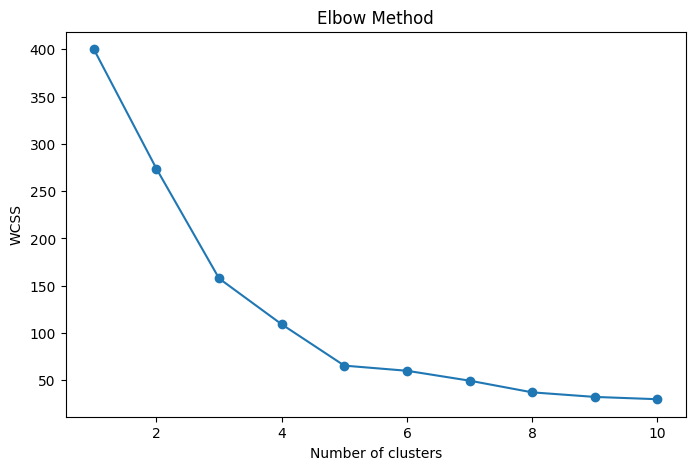

In [22]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
# Apply KMeans with chosen clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## Results & Visualization

As a result, it shows the outcome of clustering including scatterplots where each customer is assigned to a cluster, making the groups visible. Each cluster is described in terms of spending and income behavior (e.g., premium customers, budget customers, mainstream).

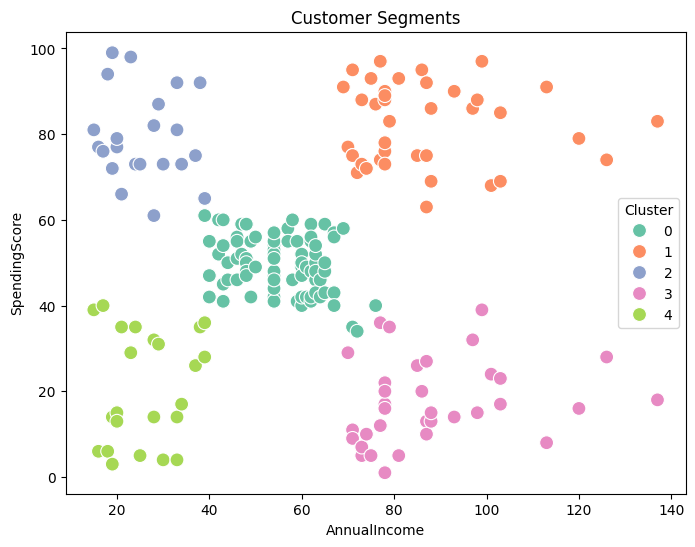

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments')
plt.show()


A scatterplot illustrates the five customer clusters. Each color represents a distinct group with similar income and spending behaviors.

**Segment Characteristics** :


* **Cluster 1**: High income – high spending (Premium customers).
*** Cluster 2**: Low income – low spending (Budget-conscious).
* **Cluster 3**: Moderate income – high spending (Potential loyal customers).
* **Cluster 4**: High income – low spending (Careful spenders).
* **Cluster 5**: Average income – average spending (Mainstream customers).


## Conclusion & Recommendations

Customers can be grouped into five behavioral segments, showing that spending habits don’t always align with income. Some segments stand out as high-value opportunities for targeted marketing.

**Business Recommendations**


* Premium customers: Offer exclusive rewards and loyalty programs.
* Budget-conscious customers: Promote affordable bundles and discounts.
* Careful spenders: Use personalized campaigns to encourage higher engagement.
* Potential loyal customers: Focus on retention strategies to increase lifetime value.Mainstream customers: Provide general offers to maintain consistent engagement.
